### Problem Statement:
Analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.
Linear Regression:

Steps:
1. Understand and visualise data
2. Model training
3. Residual Analysis
4. Prediting and Evaluating model on test data set.


### Step 1: Understand and Visualising data

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api  as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("advertising.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


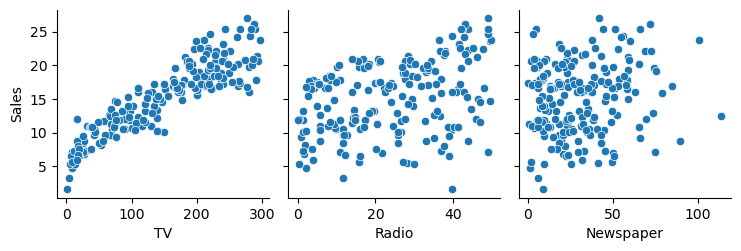

In [6]:
sns.pairplot(data=df, x_vars=['TV','Radio','Newspaper'],y_vars='Sales')
plt.show()

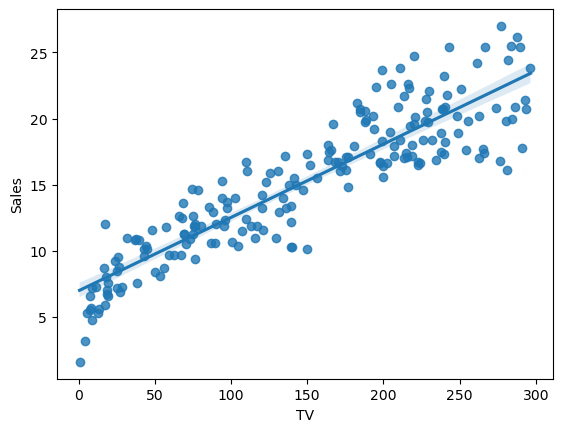

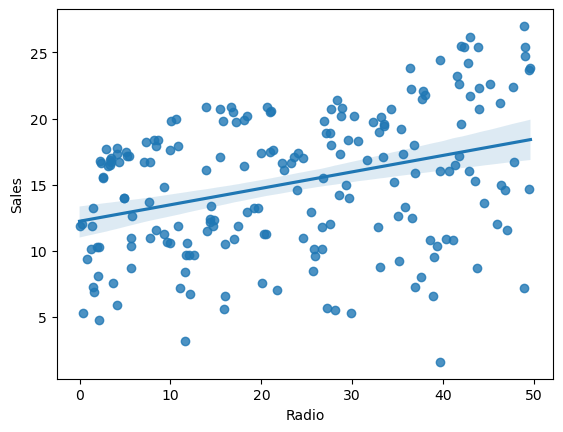

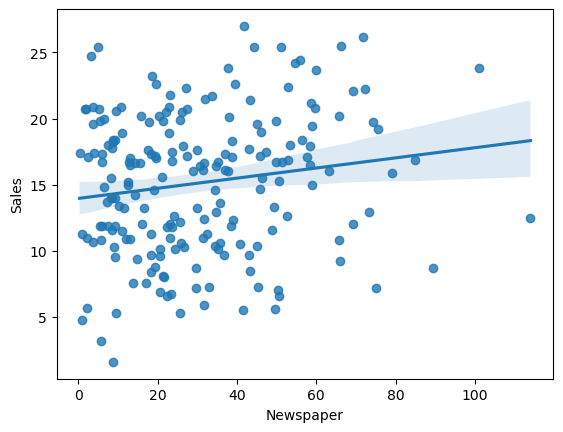

In [7]:
sns.regplot(data=df,x='TV',y='Sales')
plt.show()
sns.regplot(data=df,x='Radio',y='Sales')
plt.show()
sns.regplot(data=df,x='Newspaper',y='Sales')
plt.show()

In [8]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


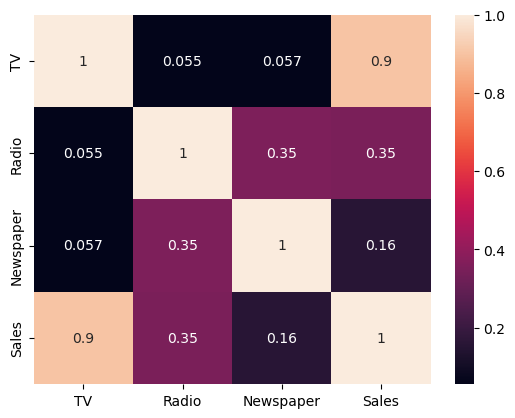

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Step 2: Model Traing

### Steps of Building a model
    - Identify X (independent variable) and y (target or predicted variable)
    - Split your data into training and testing set in 70-30 or 80-20 ratio
    - Train your model
    - Evaluate your model on training and testing set

In [10]:
#Create X and y
X = df['TV']
y = df['Sales']


In [11]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=True)


In [12]:
X_train.shape


(140,)

In [13]:
X_test.shape


(60,)

In [14]:
y_train.shape


(140,)

In [15]:
y_test.shape

(60,)

In [16]:
#Lets try training model using Statsmodels
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
116,1.0,139.2
67,1.0,139.3
78,1.0,5.4
42,1.0,293.6
17,1.0,281.4


#### Linear model : y = mx + c
Now, y = m * TV + c * 1.0
You use the command 'add_constant' so that statsmodels also fits an intercept. If you don't use this command, it will fit a line passing through the origin by default

#### OLS stands for Ordinary Least Squares, which is a method that 'statsmodels' use to fit the line

In [17]:

lr = sm.OLS(y_train,X_train_sm) #this will create an object of OLS class
lr_model = lr.fit() #this actually fits the model
lr_model.params

const    6.904032
TV       0.055661
dtype: float64

#### So, the linear regression models is give by: 
    y = mx + c
    this implies,
    y = 0.055661 * TV + 6.904032

In [18]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     610.3
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.64e-52
Time:                        20:29:20   Log-Likelihood:                -314.76
No. Observations:                 140   AIC:                             633.5
Df Residuals:                     138   BIC:                             639.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9040      0.376     18.356      0.000       6.160       7.648
TV             0.0557      0.002     24.704      0.000       0.051       0.060
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.165
Skew:                          -0.062   Prob(JB):                        0.921
Kurtosis:                       3.114   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations:
Some important stats to look:
1. #### coef: 
These are the model parameters (coef.const = c and coef.TV = m(slope of the line))
2. #### P-valueP>|t|: 
This should be as small as possible. It tells how confident the model is for given coefficients or co-efficietnts are significant relationship between sales and TV. Ideally, it should be close or less then 0.01. The higher the p-value, the less is confidence.
3. #### R-squared: 
It tells about the percentage of varience explained by independent variable to Sales. Here, around 81% of varience is explained by TV to the sales. So, 81% is hight and a good sign.
4. #### Prob (F-statistic): 
Here it is less than 0.05, we conclude that the overall model fit is significant. If it is greater than 0.05, we might need to review our model as the fit might be by chance, i.e. the line may have just luckily fit the data. The value 1.64e-52 practically 0, this means that the model for which this was calculated is definitely significant since it is less than 0.05

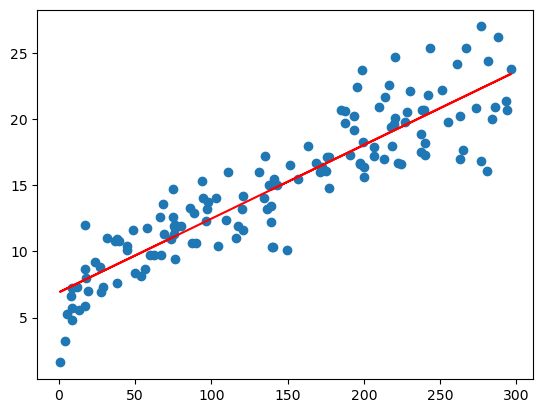

In [19]:
#lets visualise how our training model looks like
plt.scatter(X_train, y_train)
plt.plot(X_train, (6.9040 + 0.0557 * X_train), 'r')
plt.show()

### Step 3: Residual Analysis

In [20]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

116    14.652011
67     14.657577
78      7.204601
42     23.246033
17     22.566971
         ...    
133    19.138268
137    22.138383
72      8.395741
140    10.989533
37     11.061892
Length: 140, dtype: float64

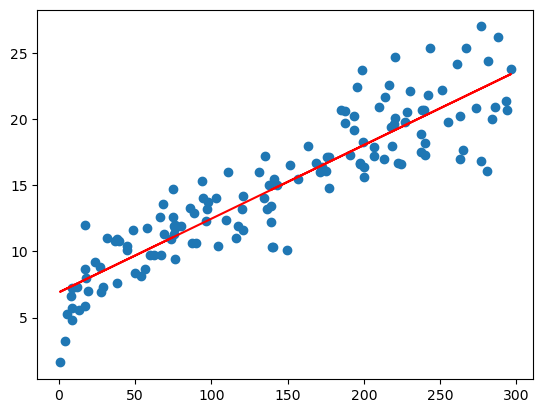

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

In [25]:
res = y_train - y_train_pred 


### For residual analysis: 
1. Look at residual plot and check if they are normally distributed
2. Look at the patterns of residual and there should not be any pattern followed by residuals

/var/folders/xr/x_j1pnw55ms124rjm48zs7k00000gn/T/ipykernel_13594/2277843020.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'Residual Plot')

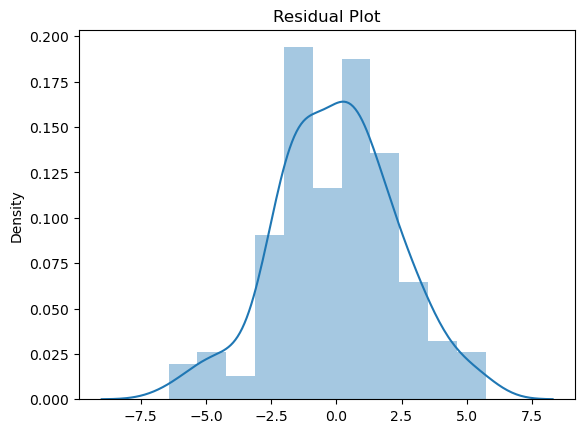

In [27]:
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

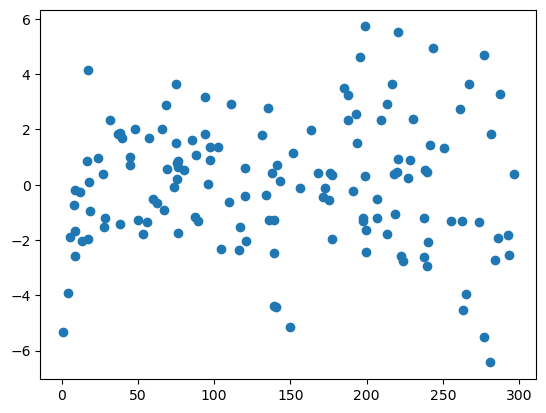

In [28]:
plt.scatter(X_train, res)
plt.show()

### Step 4: Predictions and Evaluation on test set

In [33]:
#lets first create a X_test set with added constant
X_test_sm = sm.add_constant(X_test)


In [34]:
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

58     18.637321
40     18.175337
34     12.230768
102    22.500178
184    21.030734
dtype: float64

In [35]:
r2_train_score = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train_score

0.8155807735284488

In [36]:
r2_test_score = r2_score(y_true=y_test, y_pred=y_test_pred)
r2_test_score

0.7984701565892567

In [37]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

5.14355886377359

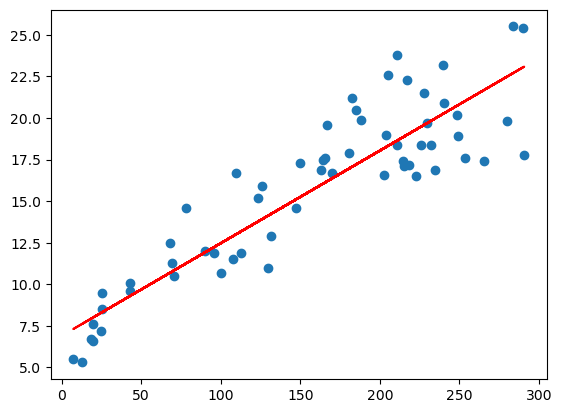

In [38]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### Linear Regression using Sklearn

In [39]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=True)


In [42]:
X_train.shape

(140,)

In [43]:
#reshare X_train and X_test, as LinearRegression model in sklearn expects X array atleast of 2 columns 
#e.g. (140, 1) not (140,)
X_train_lm = X_train.values.reshape(-1, 1) #means, take all the values of 1st column and add 1 more col
X_test_lm = X_test.values.reshape(-1,1)

In [44]:
#Steps for sklearn model building
#1. Create an object of Linear regression
lm = LinearRegression()
#2. Fir the model
lm.fit(X_train_lm, y_train)



LinearRegression()

In [45]:
#3. See the parameters and make predictions (train, test)
print(lm.coef_)
print(lm.intercept_)



[0.05566076]
6.904032471762278


In [46]:
#make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [47]:
#4. Evaluate (r2 etc.)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.8155807735284488
0.7984701565892568
